<a href="https://colab.research.google.com/github/Harhsa/Harhsa/blob/main/cleaned_minuteActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Minutes activity merged**

# Load and Inspect the Datasets

In [1]:
import pandas as pd

# Load the datasets
df_calories_minute = pd.read_csv('minuteCaloriesNarrow_merged.csv')
df_intensities_minute = pd.read_csv('minuteIntensitiesNarrow_merged.csv')
df_mets_minute = pd.read_csv('minuteMETsNarrow_merged.csv')
df_steps_minute = pd.read_csv('minuteStepsNarrow_merged.csv')

# Inspect the first few rows of each dataset
df_calories_minute.head(), df_intensities_minute.head(), df_mets_minute.head(), df_steps_minute.head()


(           Id         ActivityMinute  Calories
 0  1503960366  4/12/2016 12:00:00 AM    0.7865
 1  1503960366  4/12/2016 12:01:00 AM    0.7865
 2  1503960366  4/12/2016 12:02:00 AM    0.7865
 3  1503960366  4/12/2016 12:03:00 AM    0.7865
 4  1503960366  4/12/2016 12:04:00 AM    0.7865,
            Id         ActivityMinute  Intensity
 0  1503960366  4/12/2016 12:00:00 AM        0.0
 1  1503960366  4/12/2016 12:01:00 AM        0.0
 2  1503960366  4/12/2016 12:02:00 AM        0.0
 3  1503960366  4/12/2016 12:03:00 AM        0.0
 4  1503960366  4/12/2016 12:04:00 AM        0.0,
            Id         ActivityMinute  METs
 0  1503960366  4/12/2016 12:00:00 AM  10.0
 1  1503960366  4/12/2016 12:01:00 AM  10.0
 2  1503960366  4/12/2016 12:02:00 AM  10.0
 3  1503960366  4/12/2016 12:03:00 AM  10.0
 4  1503960366  4/12/2016 12:04:00 AM  10.0,
            Id         ActivityMinute  Steps
 0  1503960366  4/12/2016 12:00:00 AM    0.0
 1  1503960366  4/12/2016 12:01:00 AM    0.0
 2  1503960366  

Check the structure and data types of the datasets:

In [2]:
df_calories_minute.info()
df_intensities_minute.info()
df_mets_minute.info()
df_steps_minute.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250103 entries, 0 to 250102
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              250103 non-null  int64  
 1   ActivityMinute  250103 non-null  object 
 2   Calories        250103 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329790 entries, 0 to 329789
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              329790 non-null  int64  
 1   ActivityMinute  329790 non-null  object 
 2   Intensity       329789 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262480 entries, 0 to 262479
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   --

#Data Cleaning

In [12]:
# Convert the 'ActivityMinute' column to strings
df_steps_minute['ActivityMinute'] = df_steps_minute['ActivityMinute'].astype(str)

# Identify non-datetime values
invalid_rows = df_steps_minute[~df_steps_minute['ActivityMinute'].str.match(r'\d{1,2}/\d{1,2}/\d{4}')]

# Display the problematic rows
print(invalid_rows)


                Id       ActivityMinute  Steps
0       1503960366  2016-04-12 00:00:00    0.0
1       1503960366  2016-04-12 00:01:00    0.0
2       1503960366  2016-04-12 00:02:00    0.0
3       1503960366  2016-04-12 00:03:00    0.0
4       1503960366  2016-04-12 00:04:00    0.0
...            ...                  ...    ...
209370  1927972279  2016-05-06 21:30:00    0.0
209371  1927972279  2016-05-06 21:31:00    0.0
209372  1927972279  2016-05-06 21:32:00    0.0
209373  1927972279  2016-05-06 21:33:00    0.0
209374  1927972279  2016-05-06 21:34:00    0.0

[209375 rows x 3 columns]


In [13]:
# Remove rows with invalid datetime values
df_steps_minute = df_steps_minute[df_steps_minute['ActivityMinute'].str.match(r'\d{1,2}/\d{1,2}/\d{4}')]

# Convert the cleaned 'ActivityMinute' column to datetime
df_steps_minute['ActivityMinute'] = pd.to_datetime(df_steps_minute['ActivityMinute'])


#Merge the Datasets

In [14]:
df_minute_merged = pd.merge(df_calories_minute, df_intensities_minute, on=['Id', 'ActivityMinute'])
df_minute_merged = pd.merge(df_minute_merged, df_mets_minute, on=['Id', 'ActivityMinute'])
df_minute_merged = pd.merge(df_minute_merged, df_steps_minute, on=['Id', 'ActivityMinute'])


Inspect the merged dataset:

In [15]:
df_minute_merged.head()
df_minute_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              0 non-null      int64         
 1   ActivityMinute  0 non-null      datetime64[ns]
 2   Calories        0 non-null      float64       
 3   Intensity       0 non-null      float64       
 4   METs            0 non-null      float64       
 5   Steps           0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 124.0 bytes


#Exploratory Data Analysis

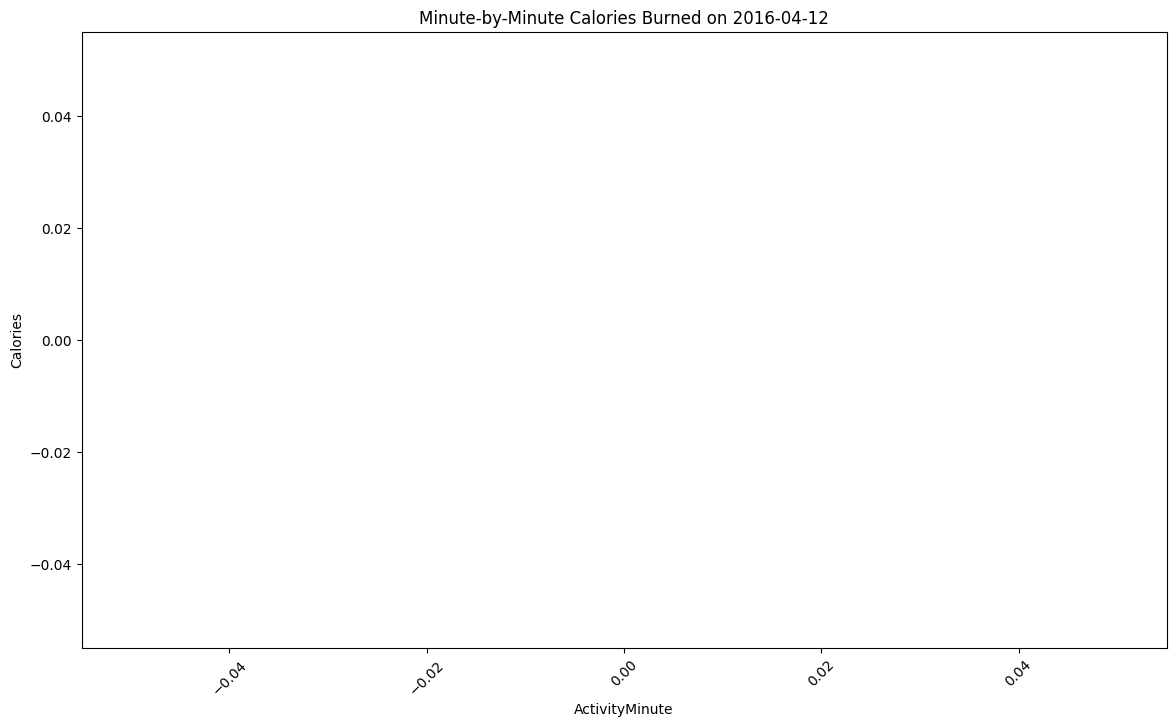

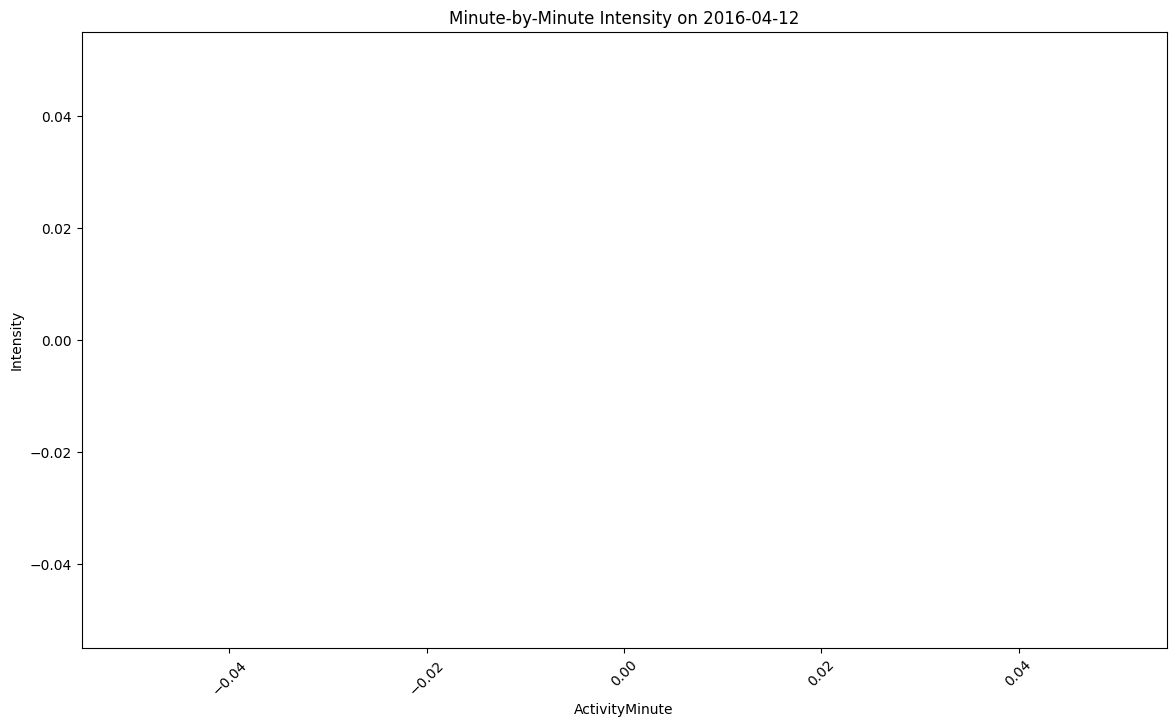

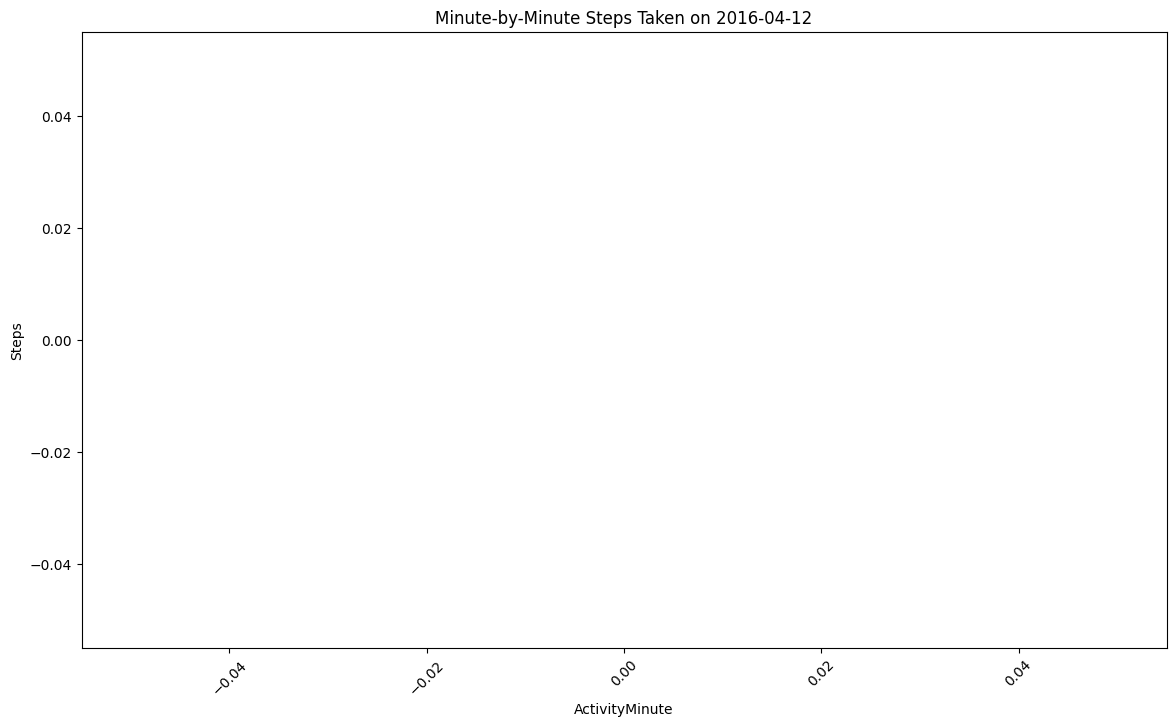

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a specific day for visualization (to avoid overcrowding)
df_sample = df_minute_merged[df_minute_merged['ActivityMinute'].dt.date == pd.to_datetime('2016-04-12')]

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityMinute', y='Calories', data=df_sample)
plt.title('Minute-by-Minute Calories Burned on 2016-04-12')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityMinute', y='Intensity', data=df_sample)
plt.title('Minute-by-Minute Intensity on 2016-04-12')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='ActivityMinute', y='Steps', data=df_sample)
plt.title('Minute-by-Minute Steps Taken on 2016-04-12')
plt.xticks(rotation=45)
plt.show()


correlation Matrix:

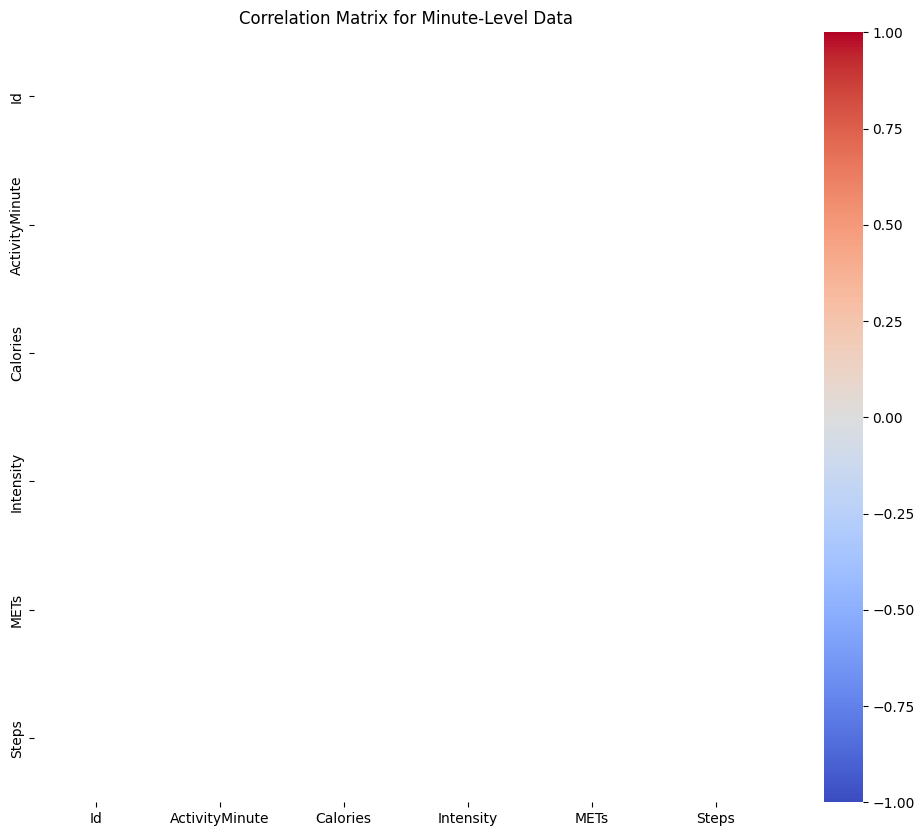

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_minute_merged.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Minute-Level Data')
plt.show()


#Dashboard Preparation

In [18]:
df_minute_merged.to_csv('cleaned_minuteActivity.csv', index=False)
